In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
dane_leki = pd.read_excel('dane_leki.xlsx', index_col=1).iloc[:,1:]

In [3]:
dane_leki.head()

,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
Nazwa,,,,,,
acetaminophen,-0.79,-0.63,2,0,2,t
acetylsalicylic acid,-0.23,1.22,1,0,4,t
bromazepam,0.38,0.57,1,0,3,t
carbamazepine,0.69,0.68,0,0,3,t
chlorpromazine,1.18,1.50,0,0,2,t


In [4]:
Y, X = dane_leki.iloc[:, 1], dane_leki.iloc[:, 1:-1]

In [17]:
Y_trening, Y_walidacja = dane_leki.where(dane_leki['Zbiór'] == 't').dropna().iloc[:,0], dane_leki.where(dane_leki['Zbiór'] == 'w').dropna().iloc[:,0]

In [18]:
Y_trening.head()

Nazwa
acetaminophen          -0.79
acetylsalicylic acid   -0.23
bromazepam              0.38
carbamazepine           0.69
chlorpromazine          1.18
Name: logK HSA, dtype: float64

In [19]:
Y_walidacja.head()

Nazwa
acyclovir      -1.25
diclofenac      1.69
famotidine     -0.77
ibuprofen       1.84
indomethacin    1.82
Name: logK HSA, dtype: float64

In [20]:
X_trening, X_walidacja = dane_leki.where(dane_leki['Zbiór'] == 't').dropna().iloc[:,1:-1], dane_leki.where(dane_leki['Zbiór'] == 'w').dropna().iloc[:,1:-1]

In [21]:
X_trening.head()

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
Nazwa,,,,
acetaminophen,-0.63,2.0,0.0,2.0
acetylsalicylic acid,1.22,1.0,0.0,4.0
bromazepam,0.57,1.0,0.0,3.0
carbamazepine,0.68,0.0,0.0,3.0
chlorpromazine,1.50,0.0,0.0,2.0


In [22]:
X_walidacja.head()

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
Nazwa,,,,
acyclovir,-0.11,3.0,0.0,6.0
diclofenac,1.98,0.0,1.0,3.0
famotidine,0.01,4.0,1.0,5.0
ibuprofen,0.73,0.0,5.0,2.0
indomethacin,1.63,1.0,4.0,5.0


In [23]:
corr_matrix = X.corr()
corr_matrix

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logKCTAB,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.135951,0.290864,0.326375,1.000000


In [24]:
linear_model = LinearRegression().fit(X_trening, Y_trening)

In [25]:
linear_model.coef_

array([ 0.47223989, -0.21607308,  0.32315214, -0.22529295])

# Rownanie modelu

$y \approx 0.472x_0 - 0.216x_1 + 0.323x_2 - 0.225x_3$

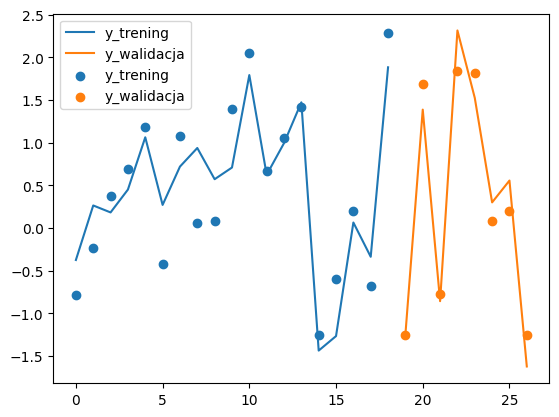

In [41]:
plt.plot(range(X_trening.shape[0]), linear_model.predict(X_trening), label="y_trening")
plt.plot(range(X_trening.shape[0], X_trening.shape[0] + X_walidacja.shape[0]),linear_model.predict(X_walidacja), label="y_walidacja")
plt.scatter(range(Y_trening.shape[0]), Y_trening, label="y_trening")
plt.scatter(range(Y_trening.shape[0] ,Y_trening.shape[0] + Y_walidacja.shape[0]), Y_walidacja, label="y_walidacja")
plt.legend()

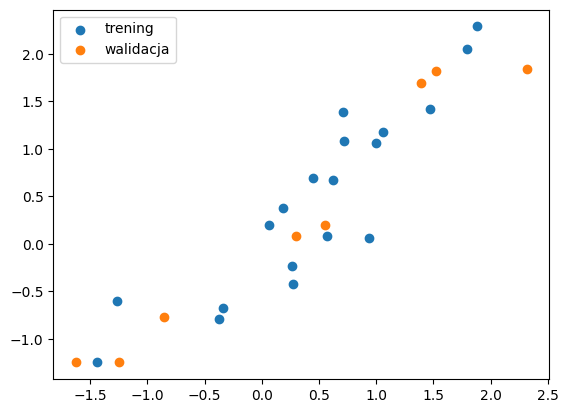

In [44]:
plt.scatter(linear_model.predict(X_trening), Y_trening, label="trening")
plt.scatter(linear_model.predict(X_walidacja), Y_walidacja, label="walidacja")
plt.legend()

In [26]:
linear_model.score(X_walidacja, Y_walidacja)

0.942439776973401